In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

Matplotlib is building the font cache; this may take a moment.


## 1. MNIST train, test dataset 가져오기

In [3]:
mnist_train=dset.MNIST("",train=True,transform=transforms.ToTensor(),target_transform=None,download=True) #Train=True-> Train용으로
mnist_test=dset.MNIST("", train=False, transform=transforms.ToTensor(),target_transform=None,download=True) # False->test용으로

## 2. 대략적인 데이터 형태

mnist_train 길이: 60000
mnist_test 길이: 10000
image data 형태: torch.Size([1, 28, 28])
label:  5


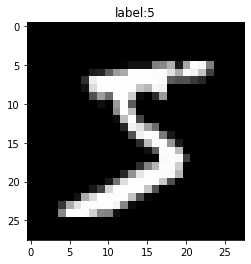

In [4]:
print("mnist_train 길이:",len(mnist_train))
print("mnist_test 길이:",len(mnist_test))

#데이터 하나 형태
image,label=mnist_train.__getitem__(0) #0번째 데이터 가져오겠다
print("image data 형태:",image.size())
print("label: ",label)

#그리기
img=image.numpy() #image type를 numpy로 변환
#(1,28,28)
plt.title("label:%d" %label)
plt.imshow(img[0],cmap='gray')
plt.show()

## 3. 데이터 로드함수

In [5]:
#hyper parameters
batch_size=1024 #1024개씩 끊어서 load하겠다
learning_rate=0.01 #0.1, 0.01 , 0.001, ,,,,
num_epoch=400

In [6]:
train_loader=torch.utils.data.DataLoader(mnist_train,batch_size=batch_size, shuffle=True, num_workers=2, drop_last=True)
test_loader=torch.utils.data.DataLoader(mnist_test,batch_size=batch_size, shuffle=False, num_workers=2, drop_last=True) 
#test할때는 보통 shuffle 사용 x , 일정하지 않기 때문에

### 데이터 로드함수 이해하기

[0]
한 번에 로드되는 데이터 크기:  1024


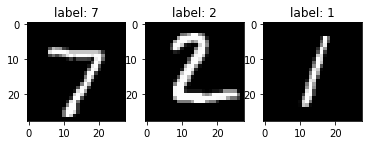

[1]
한 번에 로드되는 데이터 크기:  1024


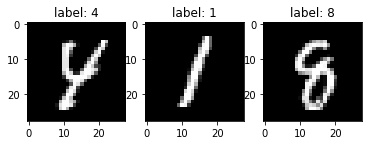

[2]
한 번에 로드되는 데이터 크기:  1024


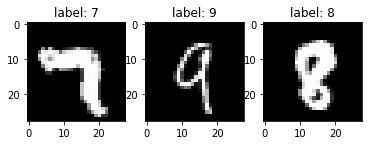

[3]
한 번에 로드되는 데이터 크기:  1024


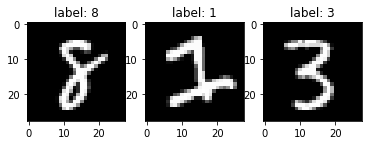

[4]
한 번에 로드되는 데이터 크기:  1024


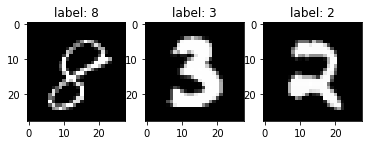

[5]
한 번에 로드되는 데이터 크기:  1024


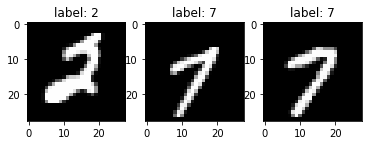

In [7]:
n=3 #샘플로 그려볼 데이터 개수
for i,[imgs,labels] in enumerate(test_loader): #batch_size만큼 (1024)
    if i>5:
        break
    print("[%d]"%i)
    print("한 번에 로드되는 데이터 크기: ",len(imgs))
    
    #그리기
    for j in range(n):
        img=imgs[j].numpy() #image 타입을 numpy로 변환 (1,28,28)
        img=img.reshape((img.shape[1],img.shape[2])) #(28,28)
        #print(img.shape)
        
        plt.subplot(1,n,j+1) #(1,3)형태 플랏의 j번째 자리에 그리겠다
        plt.imshow(img,cmap='gray')
        plt.title("label: %d"%labels[j])
        
    plt.show()

## 4. 모델선언

In [8]:
#퍼셉트론 2 hidden layer
model=nn.Sequential(nn.Linear(28*28,256),
                   nn.Sigmoid(),
                   nn.Linear(256,128),
                   nn.Linear(128,10),)
#파라미터 보기
print(list(model.parameters()))

[Parameter containing:
tensor([[-0.0173,  0.0057,  0.0088,  ...,  0.0015,  0.0163, -0.0126],
        [ 0.0139,  0.0340,  0.0178,  ...,  0.0302, -0.0240, -0.0070],
        [-0.0201, -0.0329,  0.0006,  ..., -0.0176, -0.0191,  0.0287],
        ...,
        [ 0.0169,  0.0049, -0.0102,  ..., -0.0190, -0.0316,  0.0185],
        [-0.0202, -0.0102, -0.0174,  ..., -0.0153,  0.0301, -0.0155],
        [ 0.0202, -0.0208, -0.0262,  ..., -0.0057,  0.0271, -0.0093]],
       requires_grad=True), Parameter containing:
tensor([ 0.0332, -0.0116,  0.0135,  0.0133,  0.0191, -0.0325,  0.0208, -0.0240,
         0.0007,  0.0200, -0.0065,  0.0259, -0.0161,  0.0346, -0.0102,  0.0085,
         0.0218, -0.0005,  0.0200, -0.0333, -0.0071,  0.0337,  0.0024, -0.0164,
        -0.0292, -0.0185, -0.0284,  0.0263,  0.0132,  0.0007, -0.0280,  0.0086,
        -0.0097, -0.0142, -0.0020,  0.0286,  0.0030, -0.0047, -0.0306, -0.0011,
         0.0349, -0.0324, -0.0267,  0.0050, -0.0162, -0.0208,  0.0034, -0.0341,
        -0.00

In [9]:
def ComputeAccr(dloader,imodel):
    correct=0
    total=0
    
    for j,[imgs,labels] in enumerate(dloader):
        img=imgs #x
        label=Variable(labels) #y
        #print("label size",label.size(0))
        
        img=img.reshape((img.shape[0],img.shape[2],img.shape[3])) #(batch_size,1,28,28)->(batch_size,28,28)
        img=img.reshape((img.shape[0],img.shape[1]*img.shape[2])) #(batch_size,28,28) ->(batch_size,28*28)
        img=Variable(img,requires_grad=False) #forward만 실행하겠다
        
        output=imodel(img)
        _,output_index=torch.max(output,1)
        
        total+=label.size(0) #1024
        correct+=(output_index==label).sum().float()
    print("Accuracy of Test Data: {}".format(100*correct/total))

In [10]:
ComputeAccr(test_loader,model)

Accuracy of Test Data: 14.485676765441895


## 5. loss,optimizer

In [11]:
loss_func=nn.CrossEntropyLoss() #logit (#of classes), target(1)
optimizer=optim.SGD(model.parameters(),lr=learning_rate)

## 6. 학습

In [12]:
for i in range(num_epoch):
    for j, [img,labels] in enumerate(train_loader):
        img=imgs
        label=Variable(labels)
 
        img=img.reshape((img.shape[0],img.shape[2],img.shape[3])) #(batch_size,1,28,28)->(batch_size,28,28)
        img=img.reshape((img.shape[0],img.shape[1]*img.shape[2])) #(batch_size,28,28) ->(batch_size,28*28)
        img=Variable(img,requires_grad=True) 
        
        optimizer.zero_grad()
        output=model(img)
        loss=loss_func(output,label) #(1024,10) ,(1024,1)
        
        loss.backward() #back prop
        optimizer.step() #weight 조정
    
    if i%50==0:
        print("%d.. "%i)
        ComputeAccr(test_loader,model)
        print(loss)

0.. 
Accuracy of Test Data: 11.295573234558105
tensor(2.3006, grad_fn=<NllLossBackward>)
50.. 
Accuracy of Test Data: 11.295573234558105
tensor(2.3003, grad_fn=<NllLossBackward>)
100.. 
Accuracy of Test Data: 11.295573234558105
tensor(2.3004, grad_fn=<NllLossBackward>)
150.. 
Accuracy of Test Data: 11.295573234558105
tensor(2.3008, grad_fn=<NllLossBackward>)
200.. 
Accuracy of Test Data: 11.295573234558105
tensor(2.3013, grad_fn=<NllLossBackward>)
250.. 
Accuracy of Test Data: 11.295573234558105
tensor(2.2998, grad_fn=<NllLossBackward>)
300.. 
Accuracy of Test Data: 11.295573234558105
tensor(2.3027, grad_fn=<NllLossBackward>)
350.. 
Accuracy of Test Data: 11.295573234558105
tensor(2.2969, grad_fn=<NllLossBackward>)


## 7. 테스트

In [14]:
ComputeAccr(test_loader,model) 

Accuracy of Test Data: 11.295573234558105


## 8. 학습된 파라미터 저장

In [19]:
netname='mlp_weight.pkl'
torch.save(model,netname,)

#npz만들기
#np.savez_compressed('mlp_weight.npz',
#                   W1=W1, b1=b1,
#                   W2=W2, b2=b2,
#                   W3=W3, b3=b3)